# Mínimos Cuadrados

**1. Ajustar el modelo y calcular ECM.**


Como ejemplo utilizaremos el conjunto de datos "datos_para_ipynb_3_minimos_cuadrados.txt" el cual lo pueden descargar en el mismo directorio de este ipynb o bien dando click aquí y ajustaremos tres modelos de la forma:
$$f_1(x|\beta) = \beta_0 + \beta_1 \frac{x}{x+1}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren
import seaborn as sns
sns.set_style("white")


In [2]:
datos = np.loadtxt('datos_para_ipynb_3_minimos_cuadrados.txt', skiprows=1)

In [3]:
x = datos[:,0] #pull information from first column
y = datos[:,1] #pull information from second column

In [4]:
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [5]:
y

array([-0.63, -0.6 , -1.12, -0.3 , -1.08, -0.44, -1.31, -1.4 , -0.67,
       -0.07, -0.83, -0.68,  0.04, -0.7 , -0.19, -0.81, -0.12, -0.06,
       -0.3 , -0.6 ,  0.33, -0.83, -0.13, -0.48, -0.04, -0.71, -0.53,
       -0.13,  0.03, -0.19, -0.04, -0.25,  0.52,  0.65,  0.5 ,  0.73,
       -0.24,  0.66,  0.33,  0.21,  0.33,  0.63,  0.04,  0.33,  0.53,
        0.02,  0.13,  0.38,  0.79,  0.65,  0.45,  0.61,  0.5 ,  0.9 ,
        0.81,  0.57,  1.24,  1.13,  0.4 ,  1.26,  0.39,  0.89,  1.25,
        0.9 ,  1.32,  1.3 ,  0.9 ,  0.63,  1.44,  1.24,  1.56,  1.32,
        1.19,  0.72,  0.86,  1.08,  1.47,  1.25,  0.9 ,  1.66,  1.41,
        1.39,  1.38,  1.14,  1.18,  1.79,  1.3 ,  1.46,  1.51,  1.71,
        1.95,  1.31,  1.31,  1.52,  1.38,  1.61,  2.02,  1.5 ,  1.96,
        1.58,  1.74,  2.13,  1.7 ,  2.09,  2.15,  1.64,  1.84,  2.2 ,
        2.07,  2.09,  2.33,  1.67,  1.96,  1.96,  1.8 ,  1.79,  2.31,
        1.95,  1.84,  1.98,  2.35,  2.36,  1.86,  2.21,  1.96,  2.49,
        2.52,  2.41,

In [6]:
#definiendo phi 

phi_1 = lambda var: var/(var+1)

*Construimos una matriz*

In [7]:
mpoints, = x.shape
A=np.ones((mpoints,2))
A[:,1] = phi_1(x)

In [8]:
#Calculamos la factorización QR

Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R,Q.T@y)
print('beta')
pprint.pprint(beta)

beta
array([-1.3,  6.2])


*Entonces tenemos la siguiente función:*

$$f_1(x|\beta) = -1.3 + 6.2\frac{x}{x+1}$$

In [9]:
y_ajustadas_QR = A@beta
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*phi_1(x)

In [10]:
y_ajustadas_QR

array([-1.3 , -1.24, -1.18, -1.12, -1.06, -1.01, -0.95, -0.9 , -0.84,
       -0.79, -0.74, -0.69, -0.64, -0.59, -0.54, -0.49, -0.45, -0.4 ,
       -0.36, -0.31, -0.27, -0.23, -0.19, -0.14, -0.1 , -0.06, -0.02,
        0.01,  0.05,  0.09,  0.13,  0.16,  0.2 ,  0.23,  0.27,  0.3 ,
        0.34,  0.37,  0.4 ,  0.44,  0.47,  0.5 ,  0.53,  0.56,  0.59,
        0.62,  0.65,  0.68,  0.71,  0.73,  0.76,  0.79,  0.82,  0.84,
        0.87,  0.9 ,  0.92,  0.95,  0.97,  1.  ,  1.02,  1.04,  1.07,
        1.09,  1.11,  1.14,  1.16,  1.18,  1.2 ,  1.23,  1.25,  1.27,
        1.29,  1.31,  1.33,  1.35,  1.37,  1.39,  1.41,  1.43,  1.45,
        1.47,  1.49,  1.51,  1.53,  1.54,  1.56,  1.58,  1.6 ,  1.61,
        1.63,  1.65,  1.67,  1.68,  1.7 ,  1.72,  1.73,  1.75,  1.76,
        1.78,  1.8 ,  1.81,  1.83,  1.84,  1.86,  1.87,  1.89,  1.9 ,
        1.91,  1.93,  1.94,  1.96,  1.97,  1.98,  2.  ,  2.01,  2.02,
        2.04,  2.05,  2.06,  2.08,  2.09,  2.1 ,  2.11,  2.13,  2.14,
        2.15,  2.16,

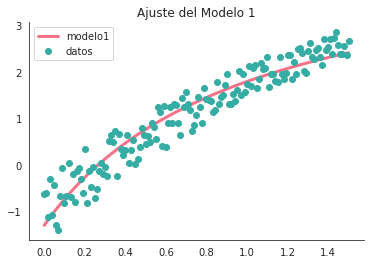

In [11]:
sns.set_context(font_scale=1, rc={"lines.linewidth": 3})
with sns.color_palette("husl", 2):
    plt.plot(x, y_ajustadas_QR , '-', x, y, 'o')
    sns.despine()
    plt.legend(['modelo1','datos'], loc='best')
    plt.title('Ajuste del Modelo 1')

*Mediante un análisis de residuales se calculan los errores cuadráticos medios, cuya fórmula es:*

$$ECM(\hat{y}) = \displaystyle \sum_{i=0}^m(y_i-\hat{y}_i)^2$$

In [12]:
forma_sumandos=(y - y_ajustadas_QR)**2

In [13]:
forma_sumandos

array([4.56e-01, 4.08e-01, 3.96e-03, 6.69e-01, 3.16e-04, 3.26e-01,
       1.25e-01, 2.54e-01, 2.97e-02, 5.27e-01, 7.51e-03, 8.85e-05,
       4.60e-01, 1.18e-02, 1.22e-01, 9.86e-02, 1.06e-01, 1.17e-01,
       3.78e-03, 8.41e-02, 3.64e-01, 3.61e-01, 3.48e-03, 1.12e-01,
       3.72e-03, 4.23e-01, 2.53e-01, 2.01e-02, 3.60e-04, 7.72e-02,
       2.71e-02, 1.72e-01, 1.04e-01, 1.70e-01, 5.35e-02, 1.85e-01,
       3.35e-01, 8.28e-02, 5.34e-03, 5.31e-02, 1.96e-02, 1.78e-02,
       2.44e-01, 5.33e-02, 3.35e-03, 3.62e-01, 2.71e-01, 9.18e-02,
       6.25e-03, 6.91e-03, 9.88e-02, 3.18e-02, 1.02e-01, 3.38e-03,
       3.61e-03, 1.08e-01, 1.00e-01, 3.32e-02, 3.31e-01, 6.97e-02,
       4.01e-01, 2.29e-02, 3.28e-02, 3.81e-02, 4.19e-02, 2.47e-02,
       6.92e-02, 3.02e-01, 5.50e-02, 2.38e-04, 9.78e-02, 2.27e-03,
       1.04e-02, 3.47e-01, 2.19e-01, 7.31e-02, 9.64e-03, 2.01e-02,
       2.63e-01, 5.34e-02, 1.36e-03, 6.47e-03, 1.11e-02, 1.35e-01,
       1.17e-01, 5.94e-02, 6.61e-02, 1.48e-02, 7.35e-03, 9.59e

In [14]:
ecm=np.sum(forma_sumandos)

In [15]:
ecm

14.656071440340163

**2. Ajustar el modelo y calcular ECM.**

$$f_2(x|\beta) = \beta_0 + \beta_1x + \beta_2x^2$$


In [16]:
#No requerimos construir A pues es un polinomio de grado2 por lo que usamos polyfit de numpy:
ngrado = 2
coeficientes = np.polyfit(x,y,ngrado)

In [17]:
pprint.pprint(coeficientes)

array([-0.69,  3.39, -0.92])


In [18]:
y_ajustadas_numpy = coeficientes[2] + coeficientes[1] * x + coeficientes[0] * x**2

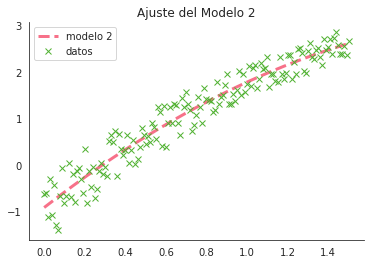

In [19]:
sns.set_context(font_scale=1, rc={"lines.linewidth": 3})
with sns.color_palette("husl", 3):
    plt.plot(x, y_ajustadas_numpy, '--',x, y, 'x')
    sns.despine()
    plt.legend(['modelo 2','datos'], loc='best')
    plt.title('Ajuste del Modelo 2')

*Mediante un análisis de residuales se calculan los errores cuadráticos medios, cuya fórmula es:*

$$ECM(\hat{y}) = \displaystyle \sum_{i=0}^m(y_i-\hat{y}_i)^2$$

In [20]:
forma_sumandos2=(y - y_ajustadas_numpy)**2

In [21]:
ecm2=np.sum(forma_sumandos2)

In [22]:
ecm2

11.974386376666107

**3. Ajustar el modelo y calcular ECM.**

$$f_3(x|\beta) = \beta_0 + \beta_1\text{log}(x+1)$$

In [23]:
#definiendo phi

phi_2 = lambda var: np.log(var+1)

In [24]:
mpoints, = x.shape
A=np.ones((mpoints,2))
A[:,1] = phi_2(x)

In [25]:
Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R,Q.T@y)
print('beta')
pprint.pprint(beta)

beta
array([-0.98,  3.96])


In [26]:
y_ajustadas_QR2 = A@beta
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*phi_1(x)

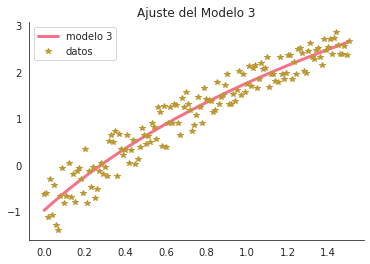

In [27]:
sns.set_context(font_scale=1, rc={"lines.linewidth": 3})
with sns.color_palette("husl", 6):
    plt.plot(x, y_ajustadas_QR2 , '-',x, y, '*')
    sns.despine()
    plt.title('Ajuste del Modelo 3')
    plt.legend(['modelo 3','datos'], loc='best')


*Mediante un análisis de residuales se calculan los errores cuadráticos medios, cuya fórmula es:*

$$ECM(\hat{y}) = \displaystyle \sum_{i=0}^m(y_i-\hat{y}_i)^2$$

In [28]:
forma_sumandos3=(y - y_ajustadas_QR2)**2

In [29]:
ecm3=np.sum(forma_sumandos3)

In [30]:
ecm3

12.041297818937325

**4. Realizar en una sola gráfica los tres modelos anteriores. ¿Cuál es el modelo con menor ECM?**


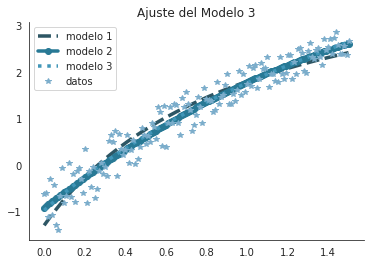

In [31]:
sns.set_context(font_scale=1, rc={"lines.linewidth": 3.5})
with sns.color_palette("PuBuGn_d", 4):
    plt.plot(x, y_ajustadas_QR, '--', x, y_ajustadas_numpy, 'o-', x, y_ajustadas_QR2,':', x, y, '*')
    sns.despine()
    plt.title('Ajuste del Modelo 3')
    plt.legend(['modelo 1', 'modelo 2', 'modelo 3','datos'], loc='best')



Después del cálculo de los ecm de los distintos modelos y la visulación de los ajustes respectivos, es el modelo 2 el que tiene el mejor ajuste. 